In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [6]:
total = np.sum(df['Confirmed'])
deaths = np.sum(df['Deaths'])
recovered = np.sum(df['Recovered'])
print("Mortality: ", deaths / total)
print("% recovered", recovered / total)

Mortality:  0.03968548255709708
% recovered 0.5745029348347455


In [7]:
cuba_data = df.where(df['Country/Region'] == 'Cuba').dropna()
cuba_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
44,Cuba,2532.0,87.0,2351.0,94.0,37.0,0.0,2.0,3.44,92.85,3.7,2446.0,86.0,3.52,Americas


In [8]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [9]:
regions = df['WHO Region'].unique()
df.groupby(['WHO Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].mean()

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Africa,15066.812500,254.645833,9180.104167,5632.062500
Americas,252551.028571,9792.342857,127674.742857,115083.942857
Eastern Mediterranean,67761.090909,1742.681818,54609.090909,11409.318182
Europe,58920.053571,3770.428571,35602.196429,19547.428571
South-East Asia,183529.700000,4134.900000,115693.300000,63701.500000
Western Pacific,18276.750000,515.562500,12923.125000,4838.062500


In [10]:
plt.rcParams['figure.figsize'] = (10, 10)

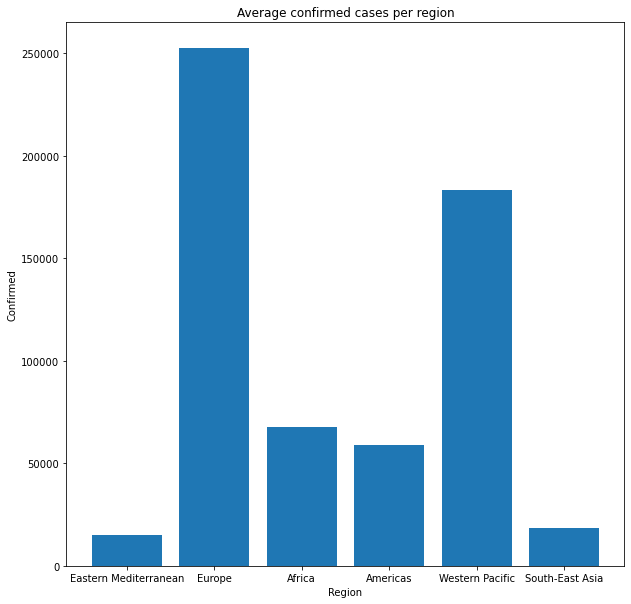

In [11]:
xs = regions
ys = df.groupby(['WHO Region'])['Confirmed'].mean()
plt.bar(xs, ys)
plt.title("Average confirmed cases per region")
plt.xlabel("Region")
plt.ylabel("Confirmed")
plt.show()

In [12]:
df_europe = df.where(df['WHO Region'] == 'Europe').dropna()

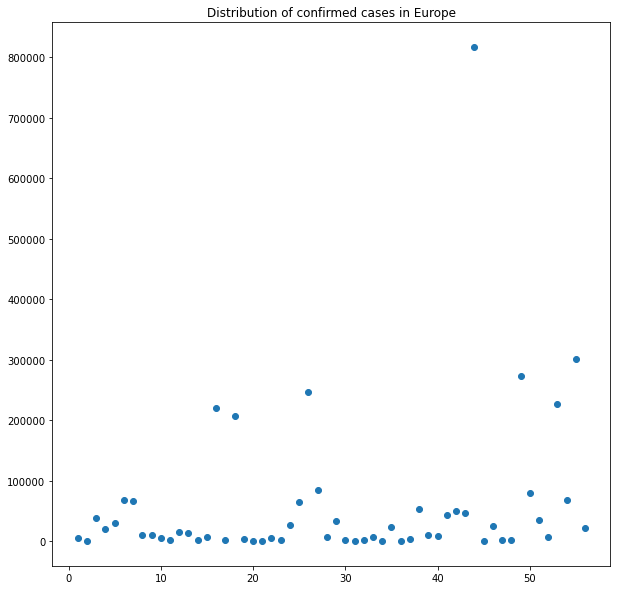

In [13]:
xs = np.arange(1, df_europe.shape[0]+1)
ys = df_europe['Confirmed']
plt.scatter(xs, ys)
plt.title("Distribution of confirmed cases in Europe")
plt.show()

In [14]:
df_europe.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0000,56.000000,56.000000,56.000000
mean,58920.053571,3770.428571,35602.196429,19547.428571,398.107143,5.428571,209.500000,4.198393,68.635000,inf,56193.142857,2726.910714,7.769643
std,127226.689411,9289.098725,91203.401254,46436.223926,869.484961,12.282815,494.610002,3.909265,26.851416,NaN,122197.389003,5854.875321,7.904270
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,12.000000,0.000000,0.000000
25%,2157.500000,66.750000,1291.750000,228.250000,6.750000,0.000000,0.000000,1.612500,55.160000,2.2250,2010.750000,98.000000,2.232500
50%,12191.000000,398.000000,5574.500000,2926.000000,101.500000,1.000000,56.500000,3.090000,76.015000,4.6900,11351.000000,903.500000,4.335000
75%,51077.500000,1686.750000,26011.750000,11335.250000,413.000000,6.000000,190.250000,4.787500,89.732500,6.5325,49579.000000,2639.000000,10.420000
max,816680.000000,45844.000000,602249.000000,254427.000000,5607.000000,85.000000,3077.000000,15.190000,100.000000,inf,776212.000000,40468.000000,32.220000


In [17]:
max_confirmed_europe = np.max(df_europe['Confirmed'])
outliner = df_europe.where(df_europe['Confirmed'] == max_confirmed_europe).dropna()
outliner

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
138,Russia,816680.0,13334.0,602249.0,201097.0,5607.0,85.0,3077.0,1.63,73.74,2.21,776212.0,40468.0,5.21,Europe


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)

In [4]:
corr_matrix = df.corr()

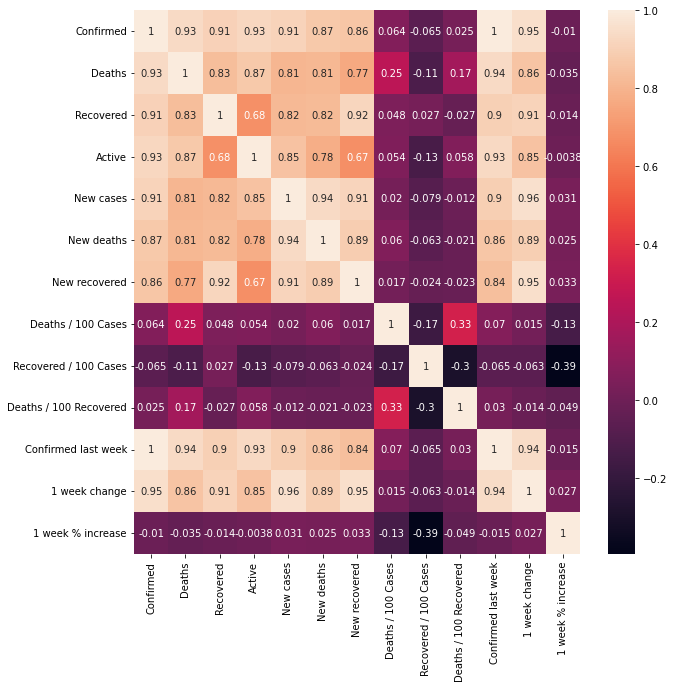

In [5]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
byregion = df.groupby(['WHO Region'])

In [11]:
total_deaths = byregion['Deaths'].sum()

In [13]:
total_deaths.index

Index(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'],
      dtype='object', name='WHO Region')

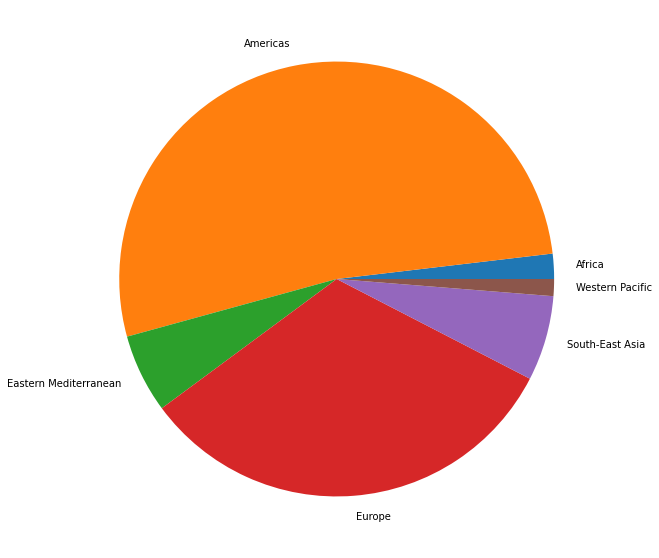

In [14]:
plt.pie(total_deaths.values, labels=total_deaths.index)
plt.show()

In [15]:
data = pd.DataFrame({ 
    'Region': byregion['WHO Region'], 
    'Confirmed': byregion['Confirmed'].sum(), 
    'Recovered': byregion['Recovered'].sum()
})

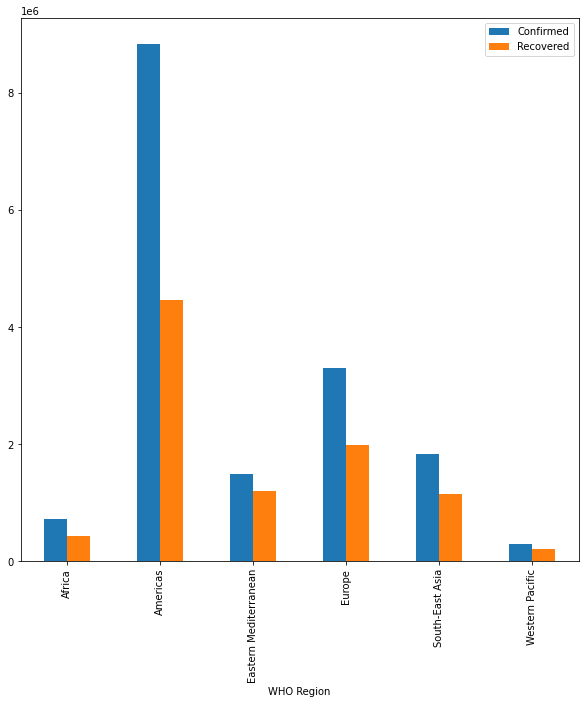

In [16]:
data.plot(kind='bar')
plt.show()

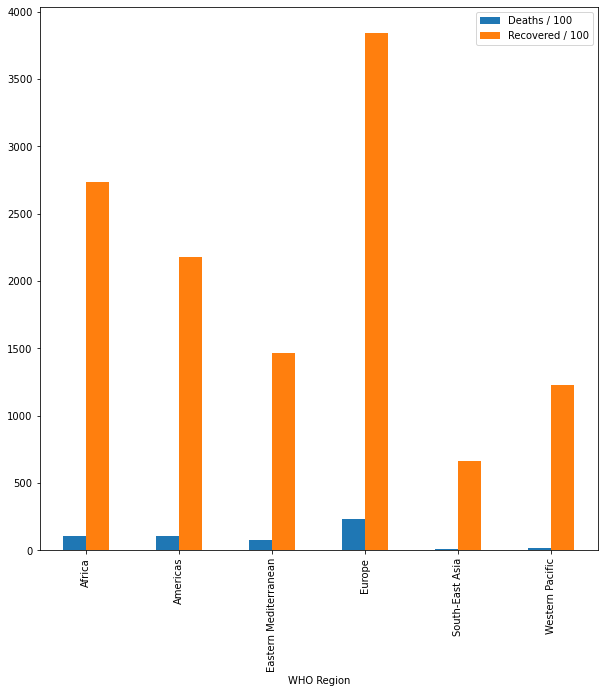

In [18]:
data = pd.DataFrame({ 
    'Region': byregion['WHO Region'], 
    'Deaths / 100': byregion['Deaths / 100 Cases'].sum(), 
    'Recovered / 100': byregion['Recovered / 100 Cases'].sum()
})
data.plot(kind='bar')
plt.show()

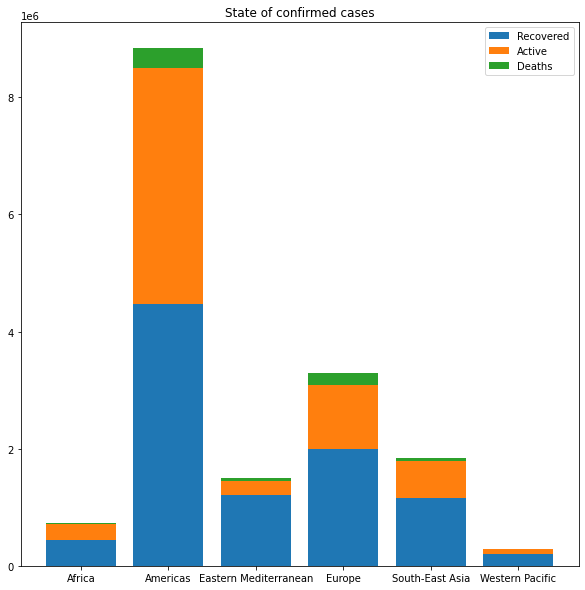

In [23]:
data = pd.DataFrame({ 
    'Region': byregion['WHO Region'], 
    'Active': byregion['Active'].sum(),
    'Recovered': byregion['Recovered'].sum(),
    'Deaths': byregion['Deaths'].sum()
})
fig, ax = plt.subplots()
ax.bar(data['Region'].index, data['Recovered'], label='Recovered')
ax.bar(data['Region'].index, data['Active'], label='Active', bottom=data['Recovered'])
ax.bar(data['Region'].index, data['Deaths'], label='Deaths', bottom=data['Recovered']+data['Active'])
plt.legend()
plt.title("State of confirmed cases")
plt.show()

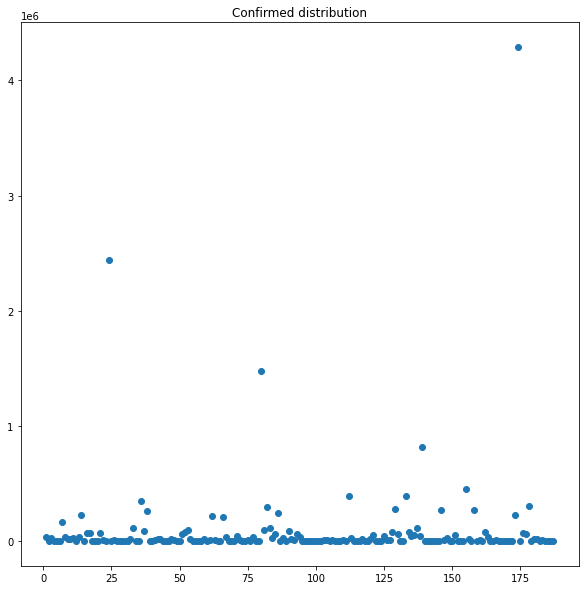

In [27]:
xs = np.arange(1, df.shape[0]+1)
ys = df['Confirmed']
plt.scatter(xs, ys)
plt.title("Confirmed distribution")
plt.show()

In [33]:
top10 = df.sort_values('Confirmed', ascending=False).head(10)
top10

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


In [35]:
top10_rate_increment = df.sort_values('1 week % increase', ascending=False).head(10)
top10_rate_increment

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
130,Papua New Guinea,62,0,11,51,0,0,0,0.00,17.74,0.00,19,43,226.32,Western Pacific
63,Gambia,326,8,66,252,49,2,6,2.45,20.25,12.12,112,214,191.07,Africa
11,Bahamas,382,11,91,280,40,0,0,2.88,23.82,12.09,174,208,119.54,Americas
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa
99,Libya,2827,64,577,2186,158,4,24,2.26,20.41,11.09,1980,847,42.78,Eastern Mediterranean
58,Ethiopia,14547,228,6386,7933,579,5,170,1.57,43.90,3.57,10207,4340,42.52,Africa
22,Botswana,739,2,63,674,53,1,11,0.27,8.53,3.17,522,217,41.57,Africa
97,Lesotho,505,12,128,365,0,0,0,2.38,25.35,9.38,359,146,40.67,Africa
160,Suriname,1483,24,925,534,44,1,35,1.62,62.37,2.59,1079,404,37.44,Americas
41,Costa Rica,15841,115,3824,11902,612,11,88,0.73,24.14,3.01,11534,4307,37.34,Americas
